# Confidence Interval - Bootstrap & Margin of Error Method - ANLY461
* Brandon Johnson
* The purpose of this notebook is to demonstrate how to create a bootstrap confidence intervale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math
import sympy as sym

**Data Generation**

In [10]:
N = 100
mean = 100
sd = 12
x = np.random.normal(loc=mean,scale=sd,size=(N))

display(Math(f'{{{N}}} \\text{{ samples from the normal distribution with }} \\mu = {{{mean}}} \\text{{ and }} \\sigma = {{{sd}}}'))
display(Math('x = '+sym.latex(sym.sympify(x.reshape(-1,5)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Point Estimate - mean**

In [14]:
x_bar = x.mean()

display(Math(f'\\bar{{x}} = {{{x_bar:.3f}}}'))

<IPython.core.display.Math object>

**Bootstrap Confidence Interval**

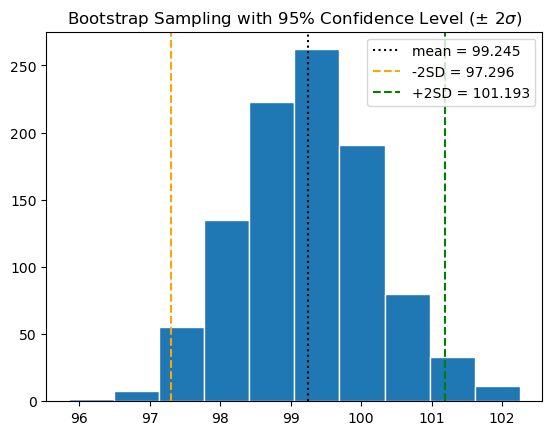

In [30]:
iterations = 1000
sample_size = 100

resamples = []

for i in range(iterations):
    index_sample = np.random.randint(low=0,high=N,size=sample_size)
    sample = x[index_sample]
    resamples.append(sample.mean())
    
    
bootstrap_mean = np.mean(resamples)
bootstrap_sd = np.std(resamples, ddof=1)
bootstrap_sd_2 = bootstrap_sd*2

plt.hist(samples, edgecolor='w')
plt.axvline(bootstrap_mean,c='k',ls=':',label=f'mean = {bootstrap_mean:.3f}')
plt.axvline(bootstrap_mean-bootstrap_sd_2, c='orange', \
            ls='--',label=f'-2SD = {bootstrap_mean-bootstrap_sd_2:.3f}')
plt.axvline(bootstrap_mean+bootstrap_sd_2, c='green', \
            ls='--',label=f'+2SD = {bootstrap_mean+bootstrap_sd_2:.3f}')
plt.title('Bootstrap Sampling with 95% Confidence Level ($\\pm$ 2$\\sigma$)')
plt.legend()
plt.show()

**Margin of Error Method**

In [34]:
mean = x.mean()
sd = x.std(ddof=1)
se = sd/np.sqrt(N)
me = se*2
CI_upper = mean+me
CI_lower = mean-me

print(f'Confidence Interval: [{CI_lower:.3f}, {CI_upper:.3f}]')

Confidence Interval: [97.170, 101.194]
